In [3]:
import cv2
import os
import glob
import numpy as np
from tqdm import tqdm # Used to display a progress bar
from sklearn.model_selection import train_test_split
from skimage import io
import matplotlib.pyplot as plt

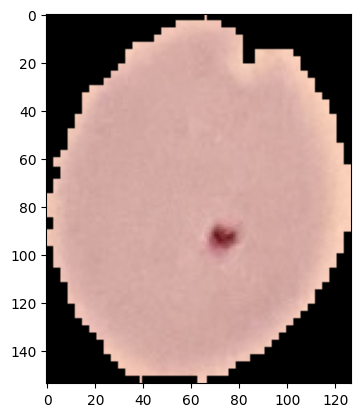

In [ ]:
import os
# accessing an image file from the dataset classes
image = io.imread(r"C:\Users\Mohamed\OneDrive\Desktop\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_180.png")
# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

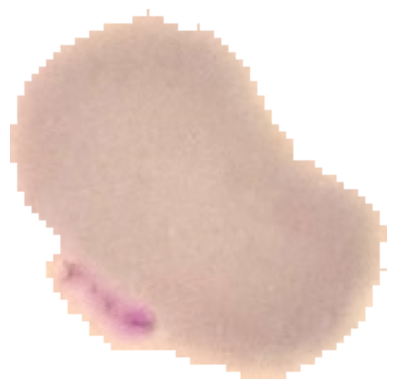

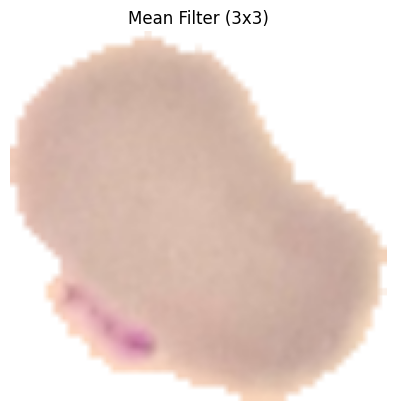

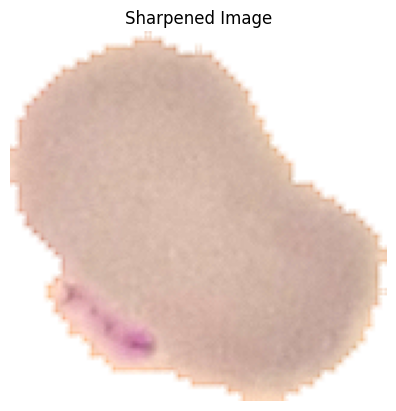

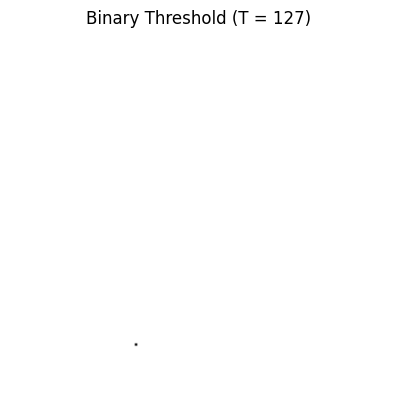

In [ ]:


# read image as BGR
img = cv2.imread(r"C:\Users\Mohamed\OneDrive\Desktop\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_180.png")

# convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# replace black background with white
mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
img_rgb[mask] = [255, 255, 255]       # set white

plt.imshow(img_rgb)
plt.axis("off")
plt.show()




# # Convert BGR → RGB for proper display
# img_rgb2 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# SMOOTHHING AND BLURING
# Reload grayscale image for filtering
# Mean (average) filter with 3x3 kernel
mean = cv2.blur(img_rgb, (3, 3))

plt.imshow(mean, cmap="gray")
plt.title("Mean Filter (3x3)")
plt.axis("off")
plt.show()


#sharpened image

kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

sharpened = cv2.filter2D(mean, -1, kernel)

plt.imshow(sharpened, cmap="gray")
plt.title("Sharpened Image")
plt.axis("off")
plt.show()


gray = cv2.cvtColor(sharpened, cv2.COLOR_RGB2GRAY)

# Global binary thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) #255 maxval->The value assigned to pixels above the threshold

plt.imshow(thresh, cmap="gray")
plt.title("Binary Threshold (T = 127)")
plt.axis("off")
plt.show()

In [ ]:
# import cv2
# import os
# import numpy as np

input_dir = r"C:\Users\Mohamed\OneDrive\Desktop\cell_images\Parasitized"  # مكان الصور
output_dir = r"C:\Users\Mohamed\OneDrive\Desktop\cell_imges_processed\processed_cells_updated"  # فولدر هيتحفظ فيه النتائج


# اعمل فولدر لو مش موجود
os.makedirs(output_dir, exist_ok=True)

# kernel حق الشاربن
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# امشي على كل الفايلات والفولدرات
for root, dirs, files in os.walk(input_dir):
    
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            
            # full path للصورة
            img_path = os.path.join(root, file)

            # Read image
            img = cv2.imread(img_path)

            if img is None:
                print("Error reading:", img_path)
                continue

            # Convert BGR -> RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # replace black background with white
            mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
            img_rgb[mask] = [255, 255, 255]       # set white

            # Mean filter
            mean = cv2.blur(img_rgb, (3, 3))

            # Sharpen
            sharpened = cv2.filter2D(mean, -1, kernel)

            # Convert to gray for threshold RGB to GRAY
            gray = cv2.cvtColor(sharpened, cv2.COLOR_RGB2GRAY)

            # Binary Threshold 
            _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

            # Path to save
            save_path = os.path.join(
                output_dir, os.path.relpath(img_path, input_dir)
            )

            # Create folder structure before saving
            os.makedirs(os.path.dirname(save_path), exist_ok=True)

            # Save processed image
            cv2.imwrite(save_path, thresh)

            print("Processed:", img_path)


Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\parasitized\C100P61ThinF_IMG_20150918_1441

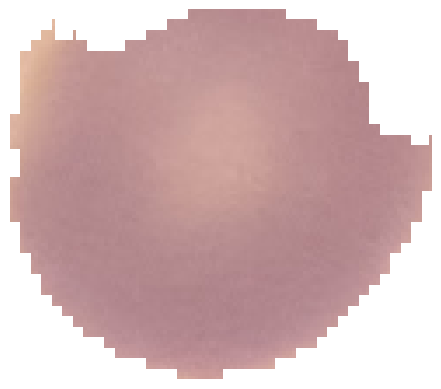

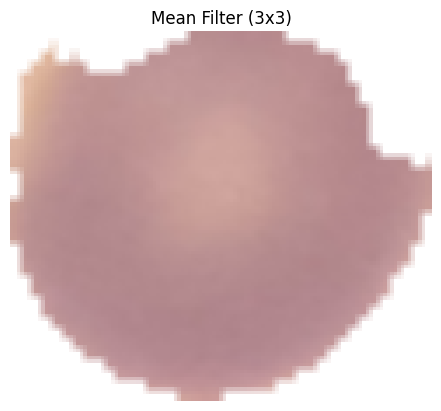

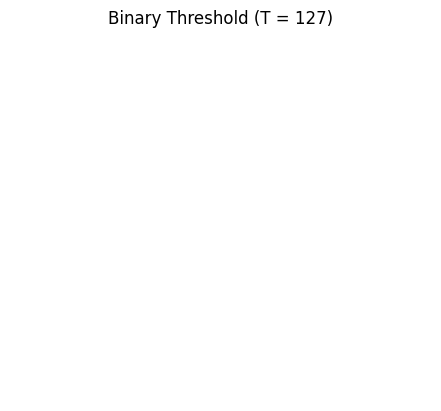

In [ ]:
# Read Data as BGR
img = cv2.imread(r"C:\Users\Mohamed\OneDrive\Desktop\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_15.png")
# Convert BGR → RGB for proper display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# replace black background with white
mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
img_rgb[mask] = [255, 255, 255]       # set white

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# # Convert BGR → RGB for proper display
# img_rgb2 = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)


# Mean (average) filter with 3x3 kernel
mean = cv2.blur(img_rgb, (3, 3))

plt.imshow(mean, cmap="gray")
plt.title("Mean Filter (3x3)")
plt.axis("off")
plt.show()

# SMOOTHHING AND BLURING
# kernel = np.array([[0,-1,0],
#                    [-1,5,-1],
#                    [0,-1,0]])

# sharpened = cv2.filter2D(img_rgb, -1, kernel)

# plt.imshow(sharpened, cmap="gray")
# plt.title("Sharpened Image")
# plt.axis("off")
# plt.show()


# # Reload grayscale image for filtering
# gray = cv2.cvtColor(mean, cv2.COLOR_RGB2GRAY)



# Global binary thresholding
_, thresh = cv2.threshold(mean, 127, 255, cv2.THRESH_BINARY) #255 maxval->The value assigned to pixels above the threshold

plt.imshow(thresh, cmap="gray")
plt.title("Binary Threshold (T = 127)")
plt.axis("off")
plt.show()

In [ ]:
# import cv2
# import os
# import numpy as np


input_dir = r"C:\Users\Mohamed\OneDrive\Desktop\cell_images\Uninfected"  # مكان الصور
output_dir = r"C:\Users\Mohamed\OneDrive\Desktop\cell_imges_processed\processed_cells_Uninfected" # فولدر هيتحفظ فيه النتائج

# اعمل فولدر لو مش موجود
os.makedirs(output_dir, exist_ok=True)

# kernel حق الشاربن
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# امشي على كل الفايلات والفولدرات
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):

            # full path للصورة
            img_path = os.path.join(root, file)

            # Read image
            img = cv2.imread(img_path)

            if img is None:
                print("Error reading:", img_path)
                continue

            # Convert BGR -> RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


            # replace black background with white
            mask = np.all(img_rgb < 40, axis=2)   # threshold for "black"
            img_rgb[mask] = [255, 255, 255]       # set white

            # Mean filter
            mean = cv2.blur(img_rgb, (3, 3))

            # Convert to gray for threshold
            gray = cv2.cvtColor(mean, cv2.COLOR_RGB2GRAY)

            # Threshold
            _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

            # Path to save
            save_path = os.path.join(
                output_dir, os.path.relpath(img_path, input_dir)
            )

            # Create folder structure before saving
            os.makedirs(os.path.dirname(save_path), exist_ok=True)

            # Save processed image
            cv2.imwrite(save_path, thresh)

            print("Processed:", img_path)


Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_48.png
Processed: D:\Project\machine-learning-project\image_data\cell_image\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_65.p

In [ ]:
# **TODO: 
DATA_DIR = r"C:\Users\Mohamed\OneDrive\Desktop\cell_imges_processed"
TARGET_SIZE = (64, 64) 



In [16]:
# Classes: Parasitized (0) and Uninfected (1)
CATEGORIES = ['processed_cells_updated', 'processed_cells_Uninfected'] 

# Lists to store the processed image arrays (X) and their labels (y)
all_processed_images = []
all_labels = []


def preprocess_image(image_path, target_size=TARGET_SIZE):
    """Function to load, resize, and scale a single image."""
    
    # 1. Load the image (OpenCV loads images in BGR format by default)
    img = cv2.imread(image_path)
    
    # Check for Integrity (Handle cases where the image fails to load)
    if img is None:
        return None

    # 2. Standardize dimensions (Resizing)
    # All images must have the same input size for the Model
    img_resized = cv2.resize(img, target_size)

    # 3. Convert BGR to RGB (Most deep learning models expect RGB format)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # 4. Scale the pixel values from [0, 255] to [0.0, 1.0]
    # Scaling speeds up convergence during model training
    img_scaled = img_rgb / 255.0

    return img_scaled



In [17]:
## Loop Through and Process all Images

print(f" Starting Image Preprocessing for {len(CATEGORIES)} Categories ")
current_label = 0 # 0 for Parasitized, 1 for Uninfected

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    # Get all image paths (assuming .png format)
    image_paths = glob.glob(os.path.join(path, '*.png'))
    
    print(f"\nProcessing {len(image_paths)} images in category: {category}")
    
    # Use tqdm to show a progress bar for the long loading process
    for image_path in tqdm(image_paths, desc=f"Cleaning {category}"):
        
        processed_img = preprocess_image(image_path)
        
        if processed_img is not None:
            # Append the processed image array
            all_processed_images.append(processed_img)
            # Append the corresponding label (0 or 1)
            all_labels.append(current_label)
        
    current_label += 1 




 Starting Image Preprocessing for 2 Categories 

Processing 13779 images in category: processed_cells_updated


Cleaning processed_cells_updated: 100%|██████████| 13779/13779 [00:05<00:00, 2543.24it/s]



Processing 13779 images in category: processed_cells_Uninfected


Cleaning processed_cells_Uninfected: 100%|██████████| 13779/13779 [00:04<00:00, 3033.50it/s]


In [18]:
## 2. Final Conversion to NumPy Arrays

print("\nFinalizing Data Arrays")

# Convert lists to NumPy arrays, which are mandatory for Model input
X_images = np.array(all_processed_images, dtype=np.float32)
y_labels = np.array(all_labels)

print(f"SUCCESS: Total images processed: {len(X_images)}")
# The final shape is (Number_of_Images, Height, Width, Color_Channels)
print(f"Final Image Data Shape (X_images): {X_images.shape}")
print(f"Final Label Data Shape (y_labels): {y_labels.shape}")




Finalizing Data Arrays
SUCCESS: Total images processed: 27558
Final Image Data Shape (X_images): (27558, 64, 64, 3)
Final Label Data Shape (y_labels): (27558,)


In [19]:
from skimage.feature import hog

X_features = []

for img in all_processed_images:
    
    if img.dtype == "float64" or img.dtype == "float32":
        img = (img * 255).astype("uint8")

    img = cv2.resize(img, (128, 128))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    features = hog(
        gray, 
        pixels_per_cell=(16,16), 
        cells_per_block=(2,2),
        orientations=9
    )

    X_features.append(features)

X_features = np.array(X_features, dtype=np.float32)

print(f"Final Feature Data Shape (X_features): {X_features.shape}")

Final Feature Data Shape (X_features): (27558, 1764)


In [20]:

# features_img = X_images  
X_images = X_features
target_labels = y_labels     

# X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(
#     features_img, 
#     target_labels, 
#     test_size=0.20, 
#     random_state=42,
#     stratify=target_labels
# )

#################################################

X_images_flat = X_images.reshape(X_images.shape[0], -1)

X_train_img, X_temp, y_train_img, y_temp = train_test_split(
    X_images_flat,
    target_labels,
    test_size=0.30,   
    random_state=42,
    stratify=target_labels
)

X_val, X_test_img, y_val, y_test_img = train_test_split(
    X_temp,
    y_temp,
    test_size=0.66, 
    random_state=42,
    stratify=y_temp
)



# # Verify Dimensions
# print("\n Image Data Splitting Completed ")
# print(f"Total Images: {len(X_images)}")
# print(f"Training Images (80%): {len(X_train_img)}")
# print(f"Testing Images (20%): {len(X_test_img)}")
# print(f"Training Features Shape: {X_train_img.shape}")
# print(f"Testing Labels Shape: {y_test_img.shape}")


###############################################################
print("\n Image Data Splitting Completed ")

print(f"Total Images: {len(X_images)}")

print("\n--- Dataset Sizes ---")
print(f"Training Images (70%): {len(X_train_img)}")
print(f"Validation Images (10%): {len(X_val)}")
print(f"Testing Images (20%): {len(X_test_img)}")

print("\n--- Feature Shapes (After Flattening) ---")
print(f"X_train shape: {X_train_img.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"X_test shape:  {X_test_img.shape}")

print("\n--- Label Shapes ---")
print(f"y_train shape: {y_train_img.shape}")
print(f"y_val shape:   {y_val.shape}")
print(f"y_test shape:  {y_test_img.shape}")



 Image Data Splitting Completed 
Total Images: 27558

--- Dataset Sizes ---
Training Images (70%): 19290
Validation Images (10%): 2811
Testing Images (20%): 5457

--- Feature Shapes (After Flattening) ---
X_train shape: (19290, 1764)
X_val shape:   (2811, 1764)
X_test shape:  (5457, 1764)

--- Label Shapes ---
y_train shape: (19290,)
y_val shape:   (2811,)
y_test shape:  (5457,)


In [21]:
# 1. Save the Training and Testing Images (Features)
np.save('X_train_img.npy', X_train_img)
np.save('X_test_img.npy', X_test_img)

# 2. Save the Training and Testing Labels (Targets)
np.save('y_train_img.npy', y_train_img)
np.save('y_test_img.npy', y_test_img)

In [22]:
from sklearn.cluster import KMeans

# 1. Load the Training and Testing Images (Features)
X_train_img = np.load('X_train_img.npy')
X_test_img = np.load('X_test_img.npy')

In [ ]:
# from skimage.feature import hog

# X_features = []

# for img in all_processed_images:
    
#     if img.dtype == "float64" or img.dtype == "float32":
#         img = (img * 255).astype("uint8")

#     img = cv2.resize(img, (128, 128))
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     features = hog(
#         gray, 
#         pixels_per_cell=(16,16), 
#         cells_per_block=(2,2),
#         orientations=9
#     )

#     X_features.append(features)

# X_features = np.array(X_features, dtype=np.float32)


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  
X_reduced = pca.fit_transform(X_train_img)

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(X_train_img)
kmeans.cluster_centers_

array([[1.7098845e-03, 6.1848725e-04, 1.5865071e-03, ..., 4.5782630e-04,
        9.7194512e-05, 4.6959845e-04],
       [1.5174947e-02, 4.3187598e-03, 1.3108383e-02, ..., 6.5202164e-03,
        1.3408414e-03, 6.2631890e-03]], shape=(2, 1764), dtype=float32)

In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_train_img, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.39805617928504944


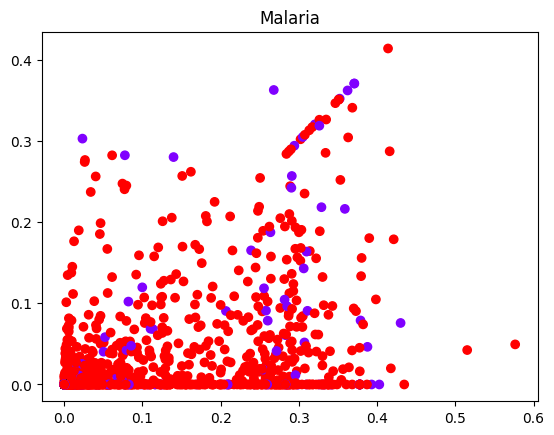

In [26]:

plt.scatter(X_train_img[:,0], X_train_img[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title('Malaria')
plt.show()

In [28]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,20):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(X_train_img)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)

# Check the result
wcss

[267255.15625,
 219668.65625,
 209158.734375,
 204755.921875,
 202204.375,
 200079.53125,
 198928.578125,
 197106.59375,
 195730.140625,
 194543.0,
 193573.53125,
 192528.984375,
 191370.25,
 190460.5,
 189691.640625,
 189029.875,
 188124.21875,
 187394.828125,
 186674.96875]

Text(0, 0.5, 'WCSS')

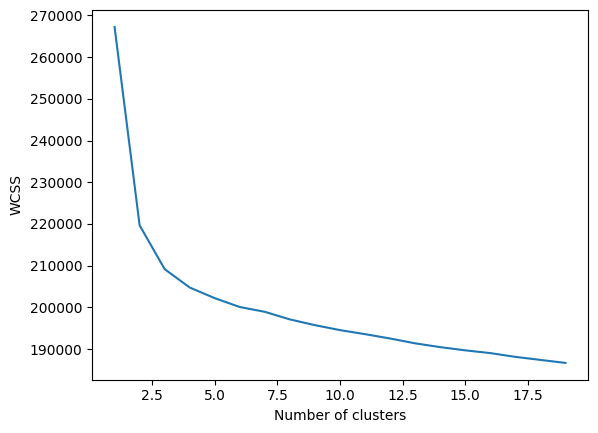

In [29]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,20),wcss)

# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [30]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_img)



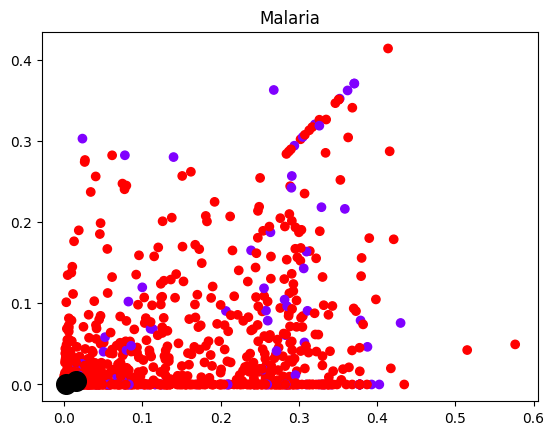

In [31]:
plt.scatter(X_train_img[:,0], X_train_img[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'k') #for centroid points
plt.title('Malaria')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
def cluster_acc(y_true, y_pred):
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    # استخدم Hungarian algorithm عشان نلاقي أفضل mapping
    row_ind, col_ind = linear_sum_assignment(-cm)
    return cm[row_ind, col_ind].sum() / y_true.size

# accuracy = cluster_acc(y_labels, y_kmeans)

# y_test_pred = kmeans.predict(X_test_img)

accuracy = cluster_acc(y_train_img, y_kmeans)
print("K-means Accuracy:", accuracy)

# y_val_pred  = kmeans.predict(X_val)
# print(y_val_pred)

K-means Accuracy: 0.8620010368066355


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,log_loss
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning



X_train_small = np.array([cv2.resize(img, (16, 16)) for img in X_train_img], dtype='float32')
X_test_small = np.array([cv2.resize(img, (16, 16)) for img in X_test_img], dtype='float32')

X_train_flat = X_train_small.reshape(X_train_small.shape[0], -1)
X_test_flat = X_test_small.reshape(X_test_small.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

Generating Loss Curve...


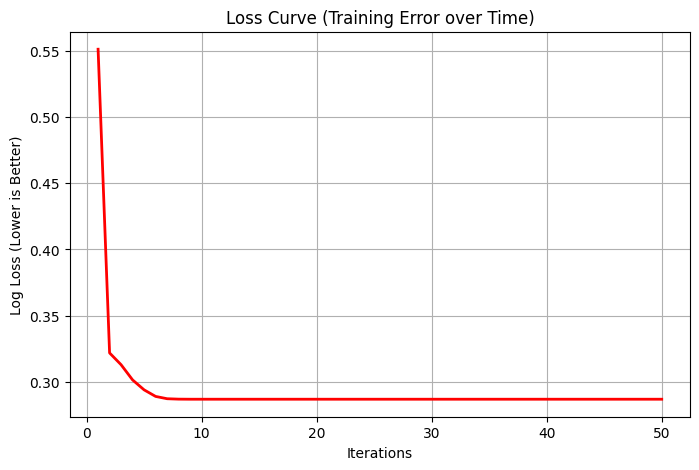

In [43]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

lr_curve = LogisticRegression(max_iter=1, solver='lbfgs', warm_start=True, random_state=42)
loss_history = []
iterations = 50

print("Generating Loss Curve...")
for i in range(iterations):
    lr_curve.fit(X_train_scaled, y_train_img)
    
    # Calculate Log Loss on training data to see learning progress
    probs = lr_curve.predict_proba(X_train_scaled)
    loss = log_loss(y_train_img, probs)
    loss_history.append(loss)
    
    lr_curve.max_iter += 1

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, iterations + 1), loss_history, color='red', lw=2)
plt.title("Loss Curve (Training Error over Time)")
plt.xlabel("Iterations")
plt.ylabel("Log Loss (Lower is Better)")
plt.grid(True)
plt.show()

In [44]:
warm_start=True
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train_img)

y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test_img, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n")
print(classification_report(y_test_img, y_pred))

Logistic Regression Accuracy: 89.66%
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2729
           1       0.86      0.95      0.90      2728

    accuracy                           0.90      5457
   macro avg       0.90      0.90      0.90      5457
weighted avg       0.90      0.90      0.90      5457



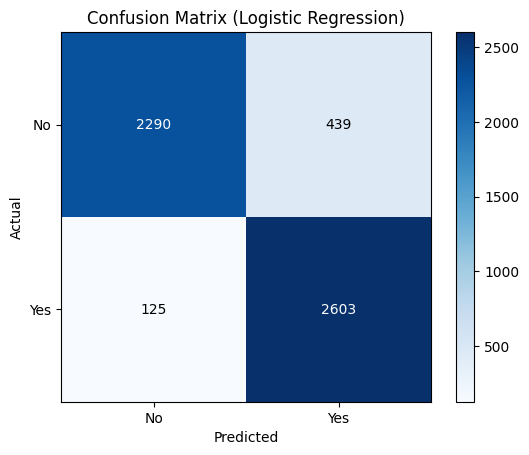

In [45]:
cm = confusion_matrix(y_test_img, y_pred)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# --- FIX 1: Check your label order ---
# Standard is [0, 1], which usually means ["No", "Yes"]
classes = ["No", "Yes"] 
plt.xticks([0, 1], labels=classes)
plt.yticks([0, 1], labels=classes)

# --- FIX 2: Dynamic Text Color (Readable on dark backgrounds) ---
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        # If the cell is dark (value > half max), use White text. Otherwise Black.
        text_color = "white" if cm[i, j] > cm.max() / 2 else "black"
        plt.text(j, i, cm[i, j], ha="center", va="center", color=text_color)

plt.show()


Area Under ROC Curve (AUC): 0.9664


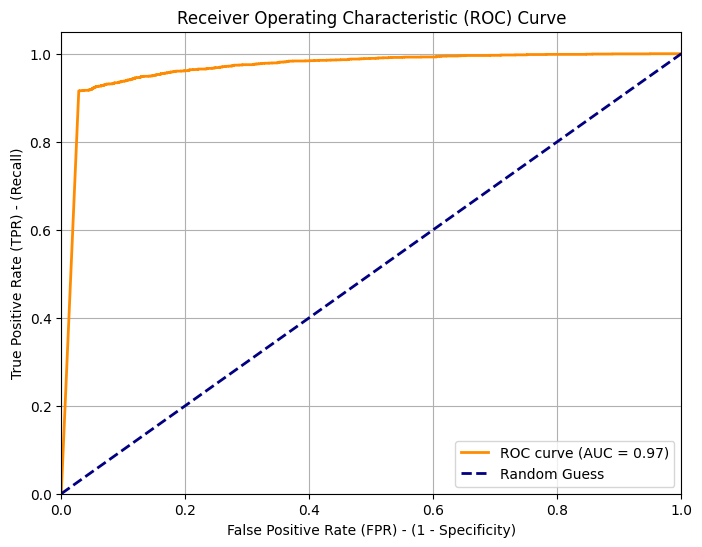

In [46]:
# --- NEW CODE for ROC Curve ---

# 1. Get the predicted probabilities for the positive class (usually index 1)
#    .predict_proba returns probabilities for all classes.
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# 2. Calculate the ROC curve points
#    This function returns the False Positive Rate (FPR) and True Positive Rate (TPR)
#    for every possible classification threshold.
fpr, tpr, thresholds = roc_curve(y_test_img, y_proba)

# 3. Calculate the Area Under the Curve (AUC)
#    AUC is the single-number summary of the ROC curve.
roc_auc = auc(fpr, tpr)
print(f"\nArea Under ROC Curve (AUC): {roc_auc:.4f}")

# 4. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR) - (1 - Specificity)')
plt.ylabel('True Positive Rate (TPR) - (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()